<a href="https://colab.research.google.com/github/ShivamBhati105/ML-models/blob/main/end_to_end_bullozer_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Sale price of Bulldozers using Machine learning

## 1. Problem definition
> How well can we predict the future  sale price of a bulldozer, given its characteristics and previous example of how much similar bulldozer have beensold  for?
[kaggle][https://www.kaggle.com/c/bluebook-for-bulldozers/data]

## 2. Data

The data is downloaded fr bBom the  kaggle Bluebook for Bulldozers.
There are 3 main datasets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the vvalidation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderbard.
* d.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competi
## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predictedacution prices.


## 4. Features
Kaggle provides a data dictionary detailing all of the features of datasets . You can view this data dictionary on Google sheets:
https://docs.google.com/spreadsheets/d/1AFiZo2m1-DsfAHTq0W0MU2-P2bkhRAHrZx30kirY4RQ/edit?usp=sharing
vi + 1 other

License
S

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Import training and validation sets
df = pd.read_csv("data/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

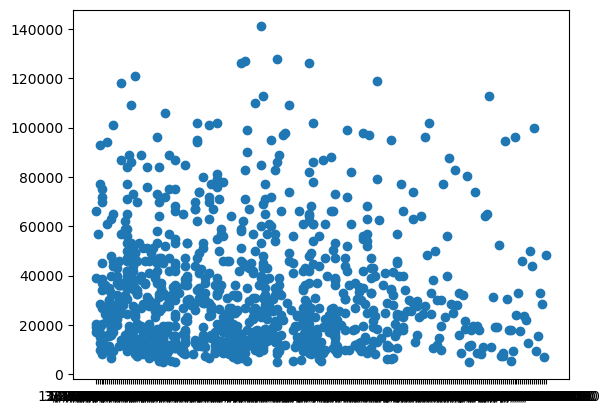

In [ ]:
fig,ax =  plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

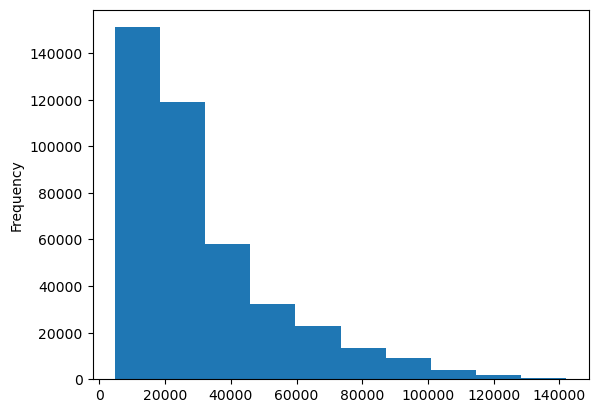

In [ ]:
df.SalePrice.plot.hist()

### Parsing dates

When we work with time series data,we want to enrich the time & date component as much as possible.
We can do that by telling pandas which of our columns has dates in  it using the `parse_dates` parameter.


In [ ]:
# Import data again but this time parse dates
df = pd.read_csv("data/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])


In [ ]:
df.saledate.dtype

dtype('<M8[ns]')

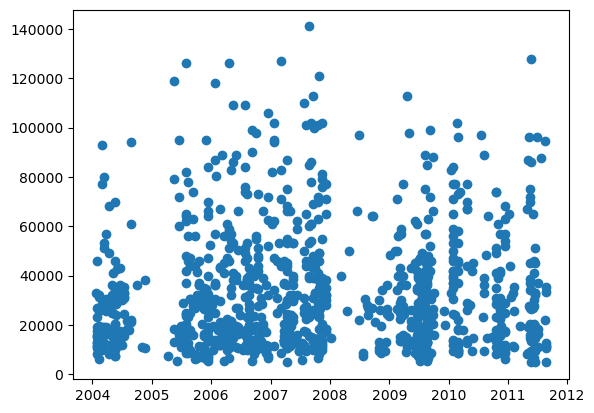

In [ ]:

fig , ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [ ]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate


In [ ]:
# Sort  DataFrame in date order
df.sort_values(by=["saledate"],inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

###
Make copy of the Orginal DataFrame

In [ ]:
# Make copy
df_temp = df.copy()

In [ ]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Add datetime parameter for `saledate` column

In [ ]:
df_temp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [ ]:
df_temp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [ ]:
df_temp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int32

In [ ]:
df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"]= df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear



In [ ]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [ ]:
# Now we've enriched our DataFrame with date time features, we can remove saledate
df_temp.drop("saledate",axis =1,inplace=True)

In [ ]:
# Check the value of different columns
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling


In [ ]:
# Let's Build a Machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [ ]:
df_temp["UsageBand"].dtype

### Convert String to Categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

In [ ]:
print("\nUnique values in 'UsageBand':", df_temp["UsageBand"].unique())
df_temp["UsageBand"] = df_temp["UsageBand"].astype(str)
print("\nIs 'UsageBand' a string dtype?", pd.api.types.is_string_dtype(df_temp["UsageBand"]))

In [ ]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

In [ ]:
 # Function to identify string columns
def find_string_columns(df_):
    string_columns = []
    for label, content in df_.items():
        if pd.api.types.is_object_dtype(content):
            non_na_values = content.dropna()
            if all(isinstance(item, str) for item in non_na_values):
                string_columns.append(label)
    return string_columns

# Find and print the columns containing strings
string_columns = find_string_columns(df_temp)
print(string_columns)

In [ ]:
# Find the column which contain strings
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [ ]:
# This will turn all of the string value into category value
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()


In [ ]:
df_temp.info()

In [ ]:
def convert_object_to_category(df_temp):
    for label, content in df_temp.items():
        if pd.api.types.is_object_dtype(content):
            df_temp[label] = content.astype('category')
    return df_temp

# Convert object dtype columns to category dtype
df_temp = convert_object_to_category(df_temp)


In [ ]:
df_temp.info()

In [ ]:
df_temp.state.cat.categories

In [ ]:
df_temp.state.cat.codes

In [ ]:
# Check Missing Data
df_temp.isnull().sum()/len(df_temp)

### Save preprocessed data

In [ ]:
# Export current temp dataframe
df_temp.to_csv("data/bluebook-for-bulldozers/train_temp.csv",
              index=False)

In [ ]:
# Import preprocessed data
df_temp =  pd.read_csv("data/bluebook-for-bulldozers/train_temp.csv",
                      low_memory= False)

In [ ]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


## Fill Missing Values

### Fill numerical missing values

In [ ]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [ ]:
#  check for which numeric colums have null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


auctioneerID
MachineHoursCurrentMeter


In [ ]:
# Fill Numeric rows with the median
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_temp[label+"_is_missing"]= pd.isnull(content)
            # Fill missing numeric values with median
            df_temp[label]= content.fillna(content.median())

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   SalesID                              412698 non-null  int64  
 1   SalePrice                            412698 non-null  float64
 2   MachineID                            412698 non-null  int64  
 3   ModelID                              412698 non-null  int64  
 4   datasource                           412698 non-null  int64  
 5   auctioneerID                         412698 non-null  float64
 6   YearMade                             412698 non-null  int64  
 7   MachineHoursCurrentMeter             412698 non-null  float64
 8   UsageBand                            73670 non-null   object 
 9   fiModelDesc                          412698 non-null  object 
 10  fiBaseModel                          412698 non-null  object 
 11  fiSecondaryDe

In [ ]:
# Check to see how many examples were missing
df_temp.auctioneerID_is_missing.value_counts()


auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

### Filling and turning categorical variables into numbers

In [ ]:
# Check for columns which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# Turn categorical variables into numbers and fill missing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value or not
        df_temp[label+"_is_missing"] =  pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes + 1

In [ ]:
pd.Categorical(df_temp["state"]).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [ ]:
pd.Categorical(df_temp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [ ]:
len(df_temp)

412698

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['UsageBand'] = label_encoder.fit_transform(df['UsageBand'].astype(str))

In [ ]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
# Fit the model
model.fit(df_temp.drop("SalePrice",axis=1),
          df_temp["SalePrice"])

CPU times: total: 34min 21s
Wall time: 3min 14s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
model.score(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

0.9875468079970562

**Question** Why doesn't the above metric hold water? (why isn't the metric reliable)

### Splitting data into train/validation sets

In [ ]:
df_temp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int32

In [ ]:
df_temp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [ ]:
# Split data into the training and validation
df_val= df_temp[df_temp.saleYear == 2012]
df_train =  df_temp[df_temp.saleYear != 2012]

len(df_val),len(df_train)

(11573, 401125)

In [ ]:
# Split data into X and y
X_train,y_train = df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid = df_val.drop("SalePrice",axis=1),df_val.SalePrice

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [ ]:
y_train

205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
393098    29000.0
400217    11000.0
400302    11000.0
400393    18000.0
393123    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation function

In [ ]:
# Create evaluation function (the compeititon uses RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def  rmsle(y_test,y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds =  model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
             "Valid MAE": mean_absolute_error(y_valid,val_preds),
             "Training RMSLE": rmsle(y_train,train_preds),
             "Valid RMSLE":rmsle(y_valid,val_preds),
             "Training R^2":r2_score(y_train,train_preds),
              "Valid R^2":r2_score(y_valid,val_preds)
             }
    return scores

## Testing our model on a subset(to tune the hyperparamters)

In [ ]:
# This takes far too long .... for experimenting
# %%time
# model  = RandomForestRegressor(n_jobs=-1,random_state=42)
# model.fit(X_train,y_train)


CPU times: total: 31min 12s
Wall time: 2min 58s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# Change max_sample value
model = RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)

In [ ]:
%%time
model.fit(X_train,y_train)

CPU times: total: 1min 2s
Wall time: 6.65 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [ ]:
(X_train.shape[0]*100) /1000000

40.1125

In [ ]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators":np.arange(10,100,10),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2),
          "max_features":[0.5,1,"sqrt","log2"],
          "max_samples":[10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True,
                             error_score='raise')

# Fit the RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 4.2 s
Wall time: 4.91 s


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 5}

In [ ]:
# Evaluate the RandomizedSearch ,model
show_scores(rs_model)

{'Training MAE': 11516.681156218974,
 'Valid MAE': 13341.913028129411,
 'Training RMSLE': 0.4966413212012988,
 'Valid RMSLE': 0.5104528743446871,
 'Training R^2': 0.5064791762150358,
 'Valid R^2': 0.5065227026487922}

### Train a model with the best hyperparameters


In [ ]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)
# Fit the ideal model
ideal_model.fit(X_train,y_train)

CPU times: total: 5min 41s
Wall time: 36.4 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [ ]:
show_scores(ideal_model)

{'Training MAE': 2953.816113716348,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [ ]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=50,
                                   min_samples_leaf=11,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=10000,
                                   max_depth =  10,
                                   random_state=42)
# Fit the ideal model
ideal_model.fit(X_train,y_train)

CPU times: total: 10.4 s
Wall time: 1.25 s


RandomForestRegressor(max_depth=10, max_features=0.5, max_samples=10000,
                      min_samples_leaf=11, min_samples_split=14,
                      n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
show_scores(ideal_model)

{'Training MAE': 7101.904943934831,
 'Valid MAE': 8321.558533766949,
 'Training RMSLE': 0.3138955492995083,
 'Valid RMSLE': 0.33294386299208956,
 'Training R^2': 0.7832080300588989,
 'Valid R^2': 0.779100379549829}

### Train a model with the best hyperparameters
**Note** These were found after 100 iterations of RandomizedSearchCV

In [ ]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)
# Fit the ideal Model
ideal_model.fit(X_train,y_train)

CPU times: total: 5min 11s
Wall time: 31.1 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [ ]:
# Scores for ideal model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2958.4803091337794,
 'Valid MAE': 5980.83750214118,
 'Training RMSLE': 0.14475216988327672,
 'Valid RMSLE': 0.24735666261254335,
 'Training R^2': 0.9587969805267057,
 'Valid R^2': 0.8806087069130661}

### Make prediction on test data


In [ ]:
# Import the test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/bluebook-for-bulldozers/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [ ]:
# Make predictions on the test datasets
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


### Preprocessing the data(getting the test datasets int the same format as our training dataset)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [ ]:
def preprocess_data(df):
    """
    Performs transformation on df and retruns transformed """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"]= df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate",axis=1,inplace=True)
    # Fill Numeric rows with the median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"]= pd.isnull(content)
            # Fill missing numeric values with median
                df[label]= content.fillna(content.median())

        ##------------------------------------------------------
        # Manually adjust df_test to have auctioneerID_is_missing column
        df_test["auctioneerID_is_missing"] = False
        ##------------------------------------------------------

            # Turn categorical variables into numbers and fill missing
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to indicate whether sample had missing value or not
                df[label+"_is_missing"] =  pd.isnull(content)
        # Turn categories into numbers and add +1
                df[label] = pd.Categorical(content).codes + 1
    return df






In [ ]:
#  Process the test data
df_test =  preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
df_test.info(103)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 102 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    SalesID                              int64  
 1    MachineID                            int64  
 2    ModelID                              int64  
 3    datasource                           int64  
 4    auctioneerID                         int64  
 5    YearMade                             int64  
 6    MachineHoursCurrentMeter             float64
 7    UsageBand                            int8   
 8    fiModelDesc                          int16  
 9    fiBaseModel                          int16  
 10   fiSecondaryDesc                      int8   
 11   fiModelSeries                        int8   
 12   fiModelDescriptor                    int8   
 13   ProductSize                          int8   
 14   fiProductClassDesc                   int8   
 15   state            

In [ ]:
# Make predictions on updated test data
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [ ]:
# we can find how columns differ using sets
set(X_train.columns) - set(df_test.columns)

set()

Finally now our test datasets has the same features as our training dataframe,

In [ ]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [ ]:
test_preds

array([18529.34876246, 18920.14779074, 54358.98185475, ...,
       13656.08914986, 18033.40901251, 32198.09505811])

In [ ]:
#Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]= test_preds
df_preds

,SalesID,SalesPrice
0,1227829,18529.348762
1,1227844,18920.147791
2,1227847,54358.981855
3,1227848,60863.157512
4,1227863,55632.080660
...,...,...
12452,6643171,39003.798436
12453,6643173,12270.980158
12454,6643184,13656.089150
12455,6643186,18033.409013


In [ ]:
# Export Predictions data
df_preds.to_csv("data/bluebook-for-bulldozers/bluebook-for-bulldozers/test_predictions.csv",index=False)

### Feature Importance
features importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (SalePrice)

In [ ]:
# Find feature importance of our model
ideal_model.feature_importances_

array([3.41602958e-02, 1.79422862e-02, 5.09162285e-02, 1.48333273e-03,
       3.28926342e-03, 1.92933469e-01, 3.09726585e-03, 9.50872814e-04,
       4.23199031e-02, 3.94453770e-02, 6.18869169e-02, 5.05101199e-03,
       2.25446625e-02, 1.43401290e-01, 4.66828752e-02, 6.00687621e-03,
       1.51403516e-03, 6.18432079e-03, 3.30675728e-03, 7.94336260e-02,
       3.05808984e-04, 5.53862765e-04, 8.49064802e-04, 1.82336251e-04,
       1.23504245e-03, 7.60031866e-05, 5.08714479e-03, 4.32234395e-03,
       6.56461442e-03, 2.22264367e-04, 7.54406453e-03, 3.48153332e-03,
       3.50836178e-03, 5.84823345e-04, 3.78706977e-04, 6.09630069e-03,
       8.11823397e-04, 1.54679413e-02, 1.45977272e-03, 1.54829041e-03,
       1.31219531e-03, 1.40281931e-03, 1.25876660e-03, 6.36659935e-04,
       3.35905894e-04, 3.49893807e-04, 2.73180326e-04, 2.42134260e-03,
       1.01053618e-03, 2.07752695e-04, 4.85980812e-04, 7.23901148e-02,
       3.80949245e-03, 5.74831882e-03, 2.86825466e-03, 9.77970862e-03,
      

In [ ]:
len(ideal_model.feature_importances_)

102

In [ ]:
# helper function for plotting feauteres importance
def plot_features(columns,importances,n=20):
    df = (pd.DataFrame({"features":columns,
                       "features_importances":importances})
         .sort_values("features_importances",ascending=False)
         .reset_index(drop=True))
    #plot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["features_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Features importances")
    ax.invert_yaxis()

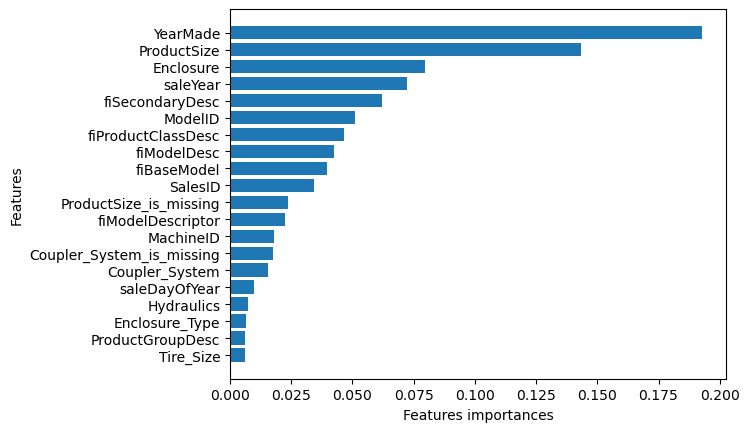

In [ ]:
plot_features(X_train.columns,ideal_model.feature_importances_)